In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import numpy as np
import math
import os
%matplotlib inline

In [3]:
FOLDER = os.getcwd()
files = []

for file in os.listdir(FOLDER):
    if file.endswith(".csv"):
        data = pd.read_csv(file)
        target_columns  = []
        for col in data.columns:
            if "Torque" in col: target_columns.append(col)
        data = data[target_columns]

        input = int(file.split("_")[0][1:])/10.0
        files.append([input, data])

In [4]:
x = [file[0] for file in files]
average_torque = [file[1]["Torque X (N-m)"].mean() for file in files]
mag_torque = []
for file in files:
    temp_list = np.array([])
    for vector in file[1].to_numpy():
        temp_list = np.append(temp_list, np.sign(file[0])*np.linalg.norm(vector, np.inf))
    mag_torque.append(temp_list.mean())

mag_torque = [0.0 if math.isnan(value) else value for value in mag_torque]

points = []
temp_dict = {}

for i in range(len(x)):
    temp_dict[x[i]] = np.array([average_torque[i], mag_torque[i]]) 

x.sort()

for key in x:
    points.append(np.append(key, temp_dict[key].flatten()))

np.array(points).transpose()[2]

array([-1.67061765e+00, -1.49410683e+00, -1.31167323e+00, -9.13617466e-01,
       -6.65223310e-01, -5.99689640e-01, -8.53470100e-01, -1.56970615e-02,
       -1.03943964e-02, -6.46336749e-03,  0.00000000e+00,  2.31608945e-04,
        0.00000000e+00,  0.00000000e+00,  8.53574529e-01,  5.79369171e-01,
        7.44960967e-01,  1.05461198e+00,  1.40998419e+00,  1.73346143e+00,
        1.96482059e+00])

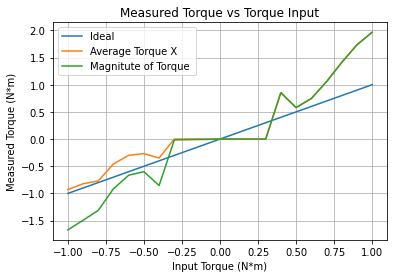

In [32]:
plt.plot(x, points)
plt.legend(["Ideal", "Average Torque X", "Magnitute of Torque "])
title = "Measured Torque vs Torque Input"
plt.title(title)
plt.xlabel("Input Torque (N*m)")
plt.ylabel("Measured Torque (N*m)")
# plt.xticks(np.linspace(int(x[0]), int(x[-1]), int((x[-1]-x[0])/0.1), endpoint=False))
plt.grid()
plt.savefig(f'{title}.svg',format='svg',bbox_inches = "tight")